In [1]:
#Import Libraies
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [45]:
customer_df = pd.read_excel("/Users/samuelpius/Downloads/Teleco churn prediction/telco_new.xlsx")

In [46]:
#data preview 
customer_df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,Zone 2,13,44,Married,9,64,College degree,5,No,Male,...,No,No,1.308333,#NULL!,#NULL!,2.014903,#NULL!,4.158883,Basic service,Yes
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,...,Yes,No,1.481605,3.032546,#NULL!,2.72458,3.575151,4.912655,Total service,Yes
2,Zone 3,68,52,Married,24,116,Did not complete high school,29,No,Female,...,Yes,No,2.898671,2.890372,#NULL!,3.409496,#NULL!,4.753590,Plus service,No
3,Zone 2,33,33,Unmarried,12,33,High school degree,0,No,Female,...,No,No,2.246015,#NULL!,#NULL!,#NULL!,#NULL!,3.496508,Basic service,Yes
4,Zone 2,23,30,Married,9,30,Did not complete high school,2,No,Male,...,Yes,No,1.840550,#NULL!,#NULL!,#NULL!,#NULL!,3.401197,Plus service,No


In [47]:
# Check the shape of the data
print("Number of rows:", customer_df.shape[0])
print("Number of columns:", customer_df.shape[1])

Number of rows: 1000
Number of columns: 42


In [48]:
# Check the data types of variables
customer_df.dtypes

region       object
tenure        int64
age           int64
marital      object
address       int64
income        int64
ed           object
employ        int64
retire       object
gender       object
reside        int64
tollfree     object
equip        object
callcard     object
wireless     object
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
equipten    float64
cardten     float64
wireten     float64
multline     object
voice        object
pager        object
internet     object
callid       object
callwait     object
forward      object
confer       object
ebill        object
loglong     float64
logtoll      object
logequi      object
logcard      object
logwire      object
lninc       float64
custcat      object
churn        object
dtype: object

In [49]:
# Check the descriptive statistics of numeric variables
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,1000.0,35.526000,21.359812,1.000000,17.000000,34.000000,54.000000,72.000000
age,1000.0,41.684000,12.558816,18.000000,32.000000,40.000000,51.000000,77.000000
address,1000.0,11.551000,10.086681,0.000000,3.000000,9.000000,18.000000,55.000000
income,1000.0,77.535000,107.044165,9.000000,29.000000,47.000000,83.000000,1668.000000
employ,1000.0,10.987000,10.082087,0.000000,3.000000,8.000000,17.000000,47.000000
reside,1000.0,2.331000,1.435793,1.000000,1.000000,2.000000,3.000000,8.000000
longmon,1000.0,11.723100,10.363486,0.900000,5.200000,8.525000,14.412500,99.950000
tollmon,1000.0,13.274000,16.902122,0.000000,0.000000,0.000000,24.250000,173.000000
equipmon,1000.0,14.219800,19.068539,0.000000,0.000000,0.000000,31.475000,77.700000
cardmon,1000.0,13.781000,14.084496,0.000000,0.000000,12.000000,20.500000,109.250000


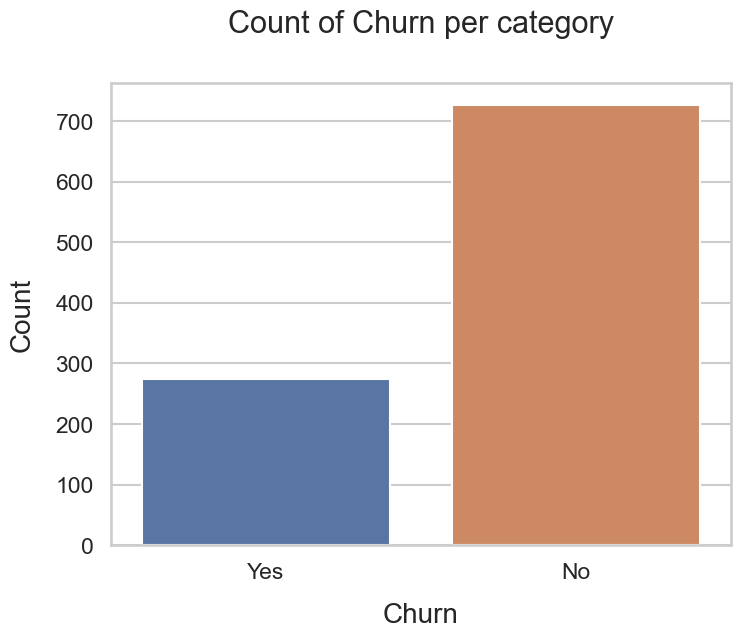

In [50]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x="churn", data=customer_df)
plt.xlabel("Churn", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of Churn per category", y=1.02);


In [51]:
# Calculate the percentage of each category of the target variable
churn_pct = 100 * customer_df["churn"].value_counts() / len(customer_df["churn"])
print("Percentage of each category of the target variable:\n", churn_pct)

# Check the missing values
missing_pct = 100 * customer_df.isnull().sum() / customer_df.shape[0]
missing_df = pd.DataFrame({"variable": customer_df.columns, "missing_pct": missing_pct}).sort_values("missing_pct", ascending=False)


Percentage of each category of the target variable:
 No     72.6
Yes    27.4
Name: churn, dtype: float64


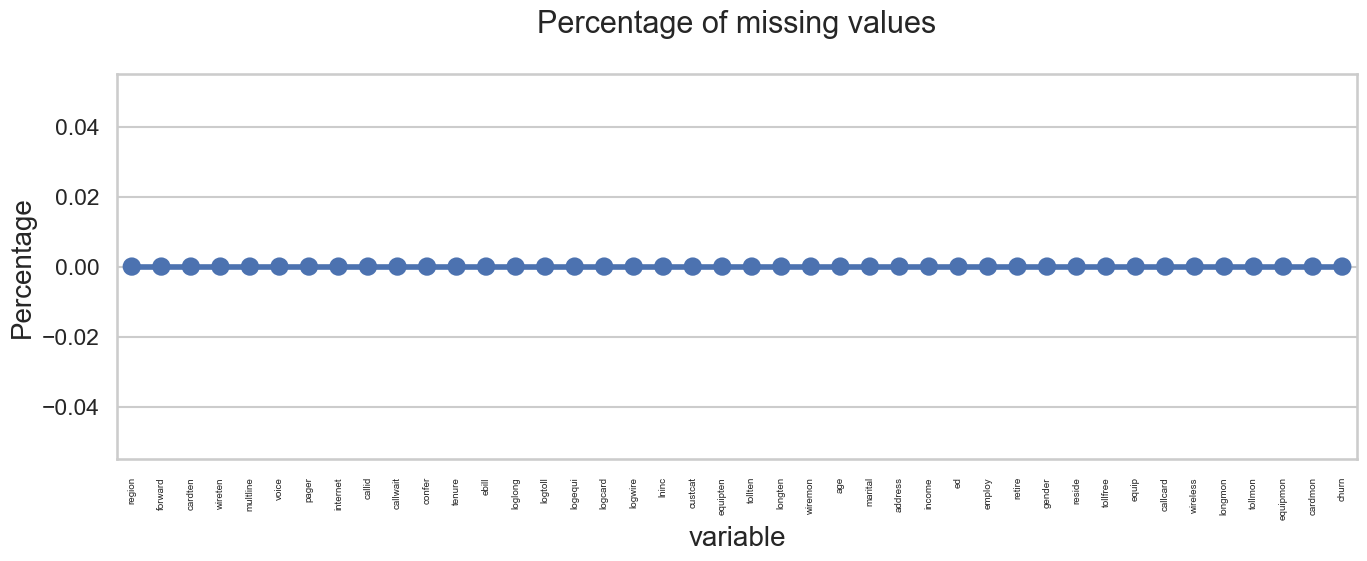

In [52]:
plt.figure(figsize=(16,5))
sns.pointplot(x="variable", y="missing_pct", data=missing_df)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of missing values")
plt.ylabel("Percentage")
plt.show()


In [53]:
print(customer_df[["loglong", "logtoll", "logequi", "logcard", "logwire"]].dtypes)


loglong    float64
logtoll     object
logequi     object
logcard     object
logwire     object
dtype: object


In [54]:
customer_df["logtoll"] = pd.to_numeric(customer_df["logtoll"], errors="coerce")
customer_df["logequi"] = pd.to_numeric(customer_df["logequi"], errors="coerce")
customer_df["logcard"] = pd.to_numeric(customer_df["logcard"], errors="coerce")
customer_df["logwire"] = pd.to_numeric(customer_df["logwire"], errors="coerce")


In [55]:
# Fill the missing values
customer_df[["logtoll", "logequi", "logcard", "logwire"]] = customer_df[["logtoll", "logequi", "logcard", "logwire"]].fillna(0)

# Create new variables
customer_df["total_monthly_bill"] = customer_df["longmon"] + customer_df["tollmon"] + customer_df["equipmon"] + customer_df["cardmon"] + customer_df["wiremon"]
customer_df["total_ten_months_bill"] = customer_df["longten"] + customer_df["tollten"] + customer_df["equipten"] + customer_df["cardten"] + customer_df["wireten"]
customer_df["total_log_bill"] = customer_df["loglong"] + customer_df["logtoll"] + customer_df["logequi"] + customer_df["logcard"] + customer_df["logwire"]


In [56]:
customer_df.drop(columns=["loglong", "logtoll", "logequi", "logcard", "logwire", "longmon", "tollmon", "equipmon", "cardmon", "wiremon"], inplace=True)


In [57]:
# creating a copy of the data for manipulation and processing 
data = customer_df.copy()

In [58]:
# Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12,
# for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...
# Get the max tenure
print(data['tenure'].max()) #72

72


In [59]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)
data['tenure_group'].value_counts()


13 - 24    190
1 - 12     181
61 - 72    167
25 - 36    154
37 - 48    154
49 - 60    154
Name: tenure_group, dtype: int64

In [60]:
# creating age group
bins= [18,62,80]
labels = ['Junior','Senior']
data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
data['AgeGroup'].value_counts()


Junior    926
Senior     74
Name: AgeGroup, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


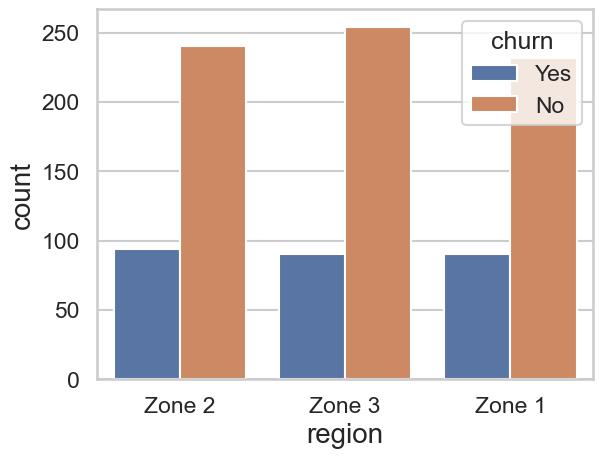

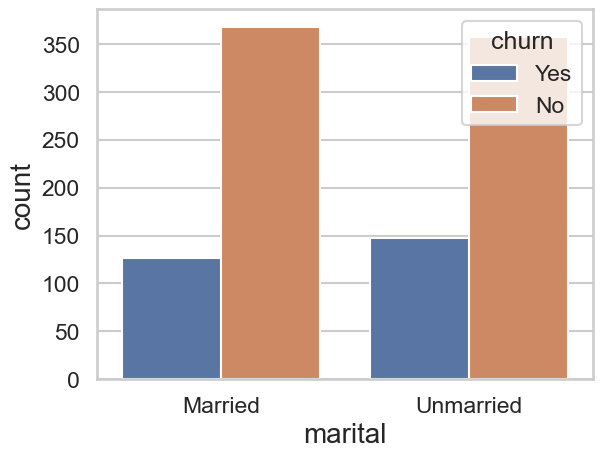

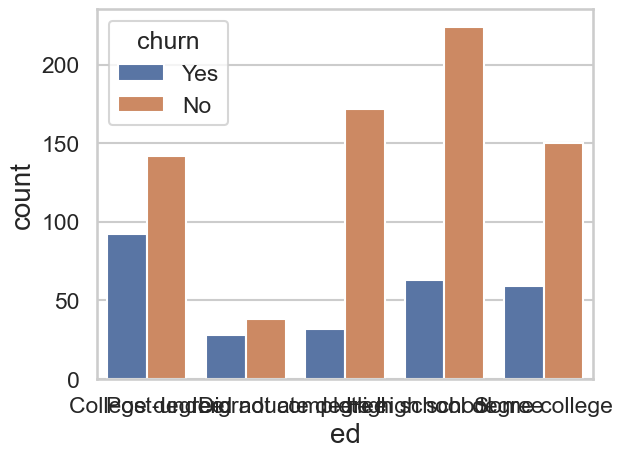

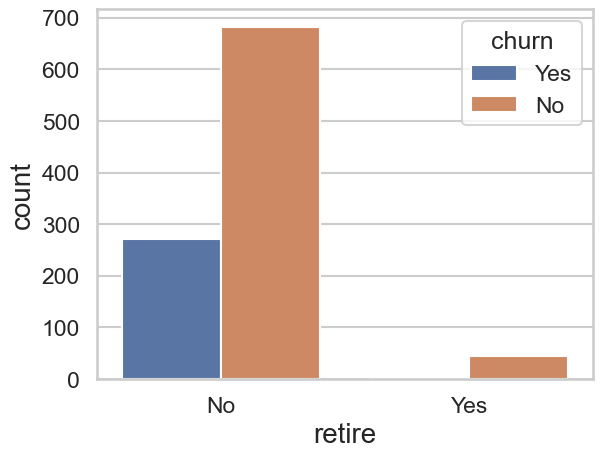

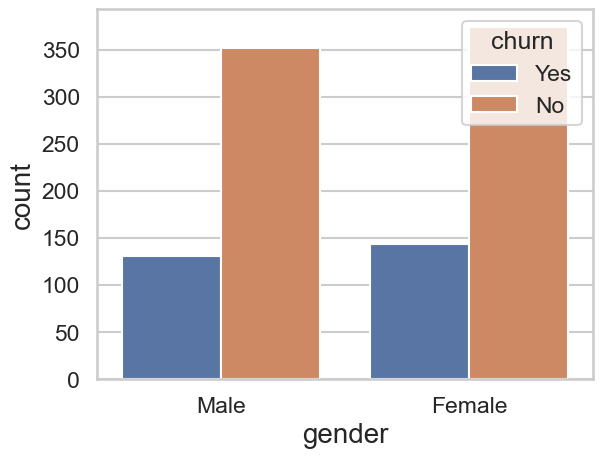

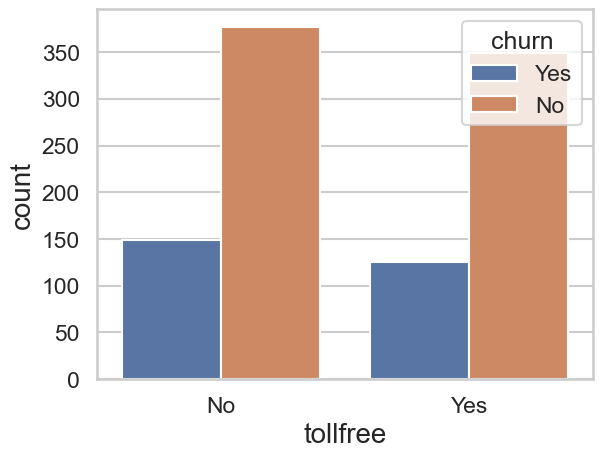

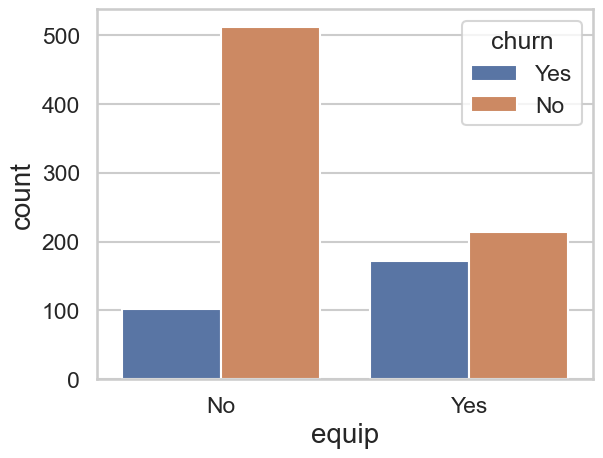

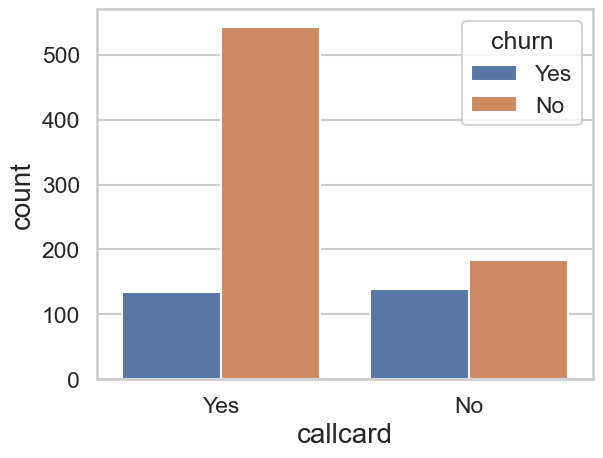

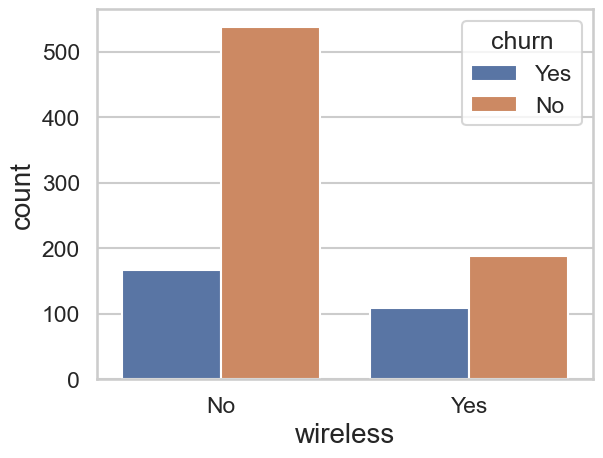

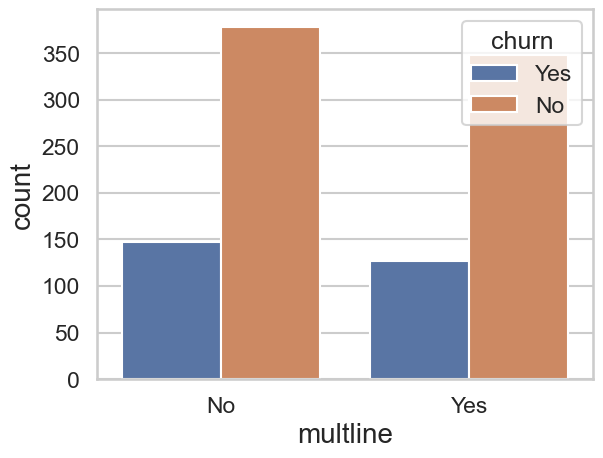

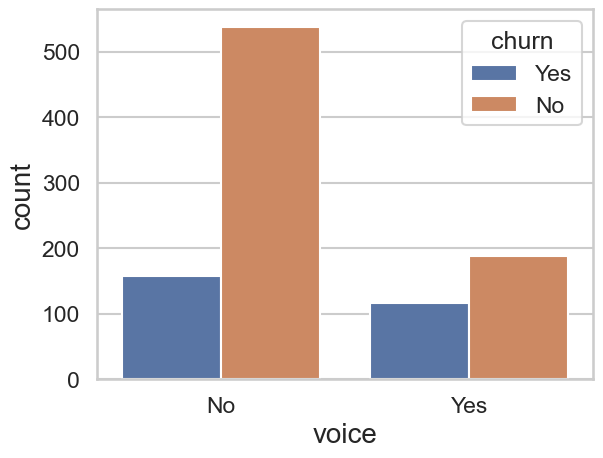

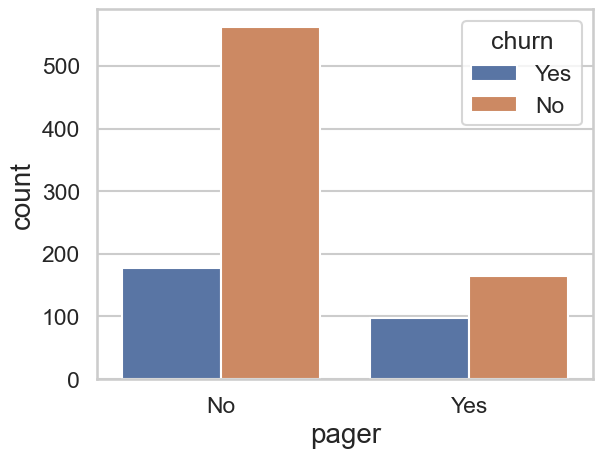

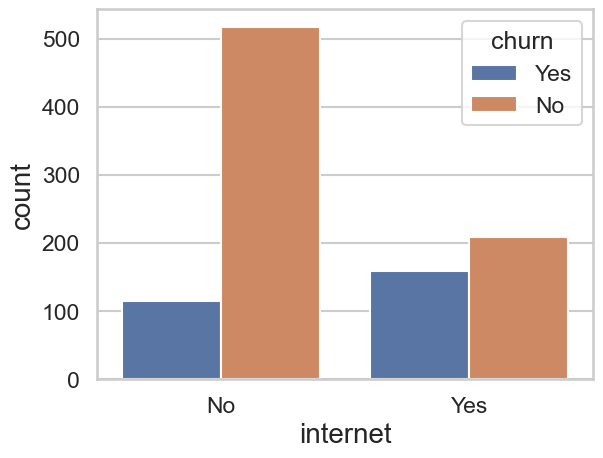

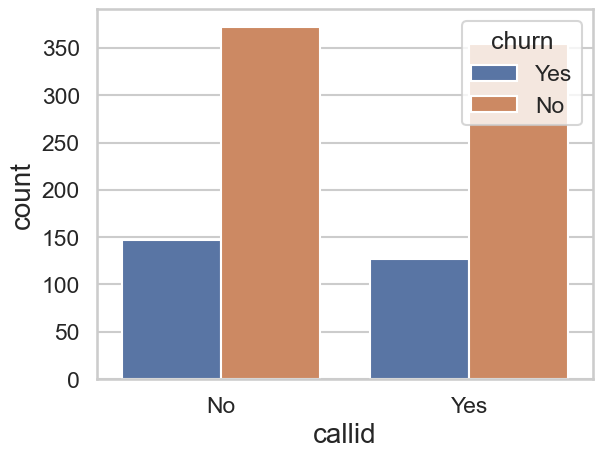

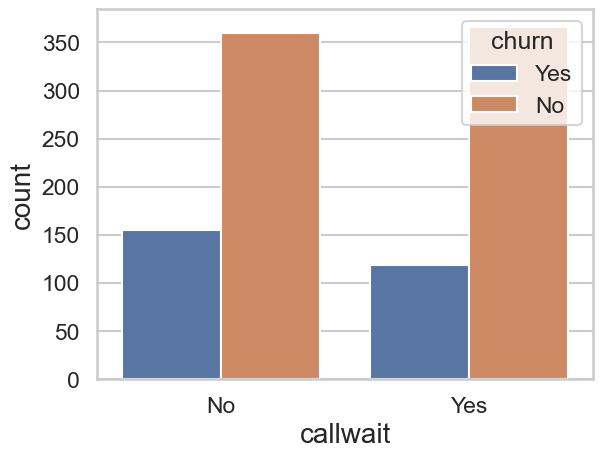

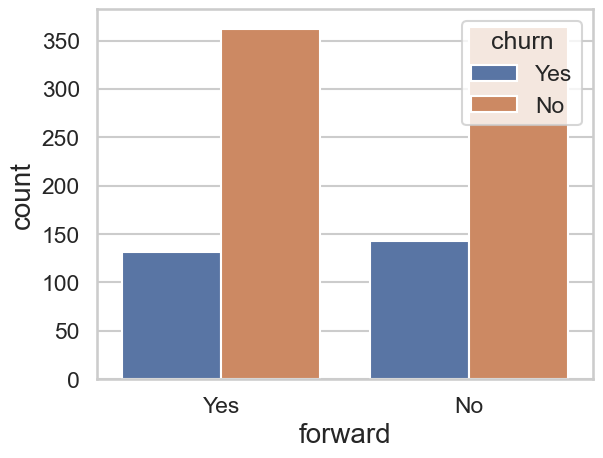

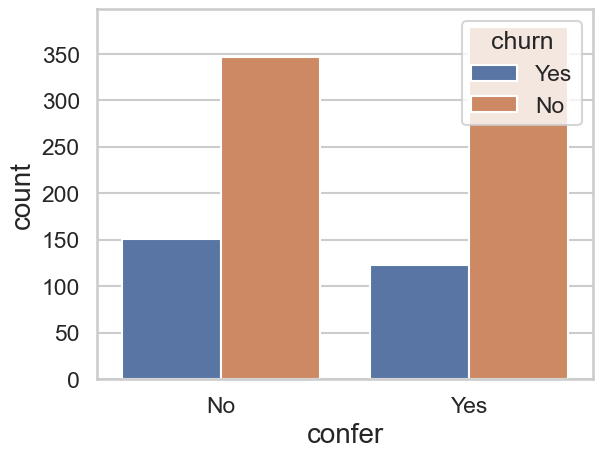

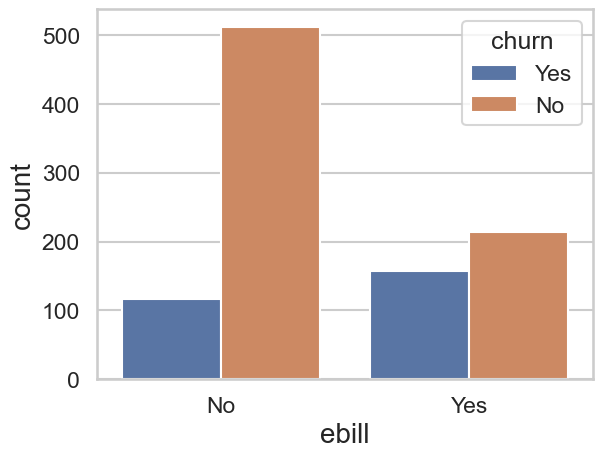

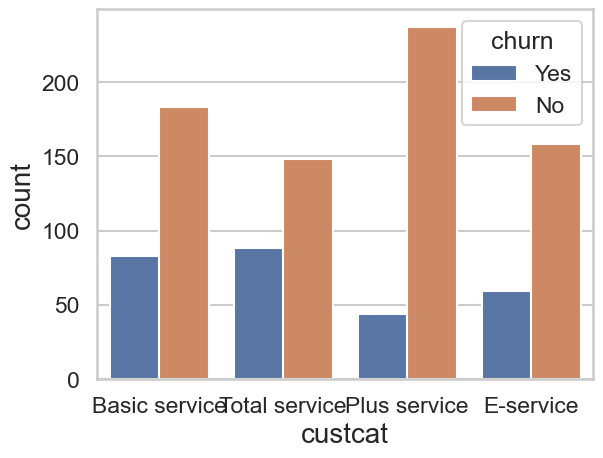

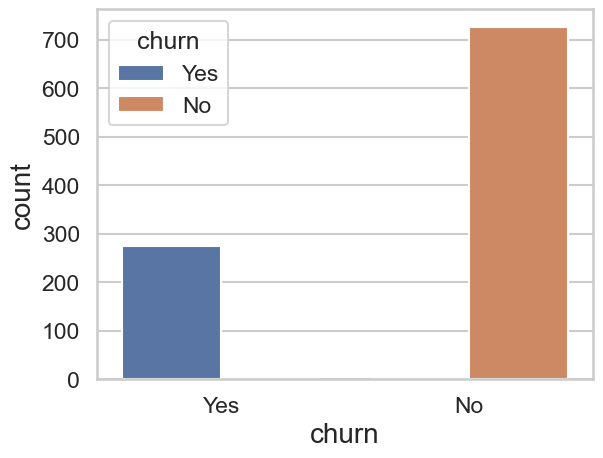

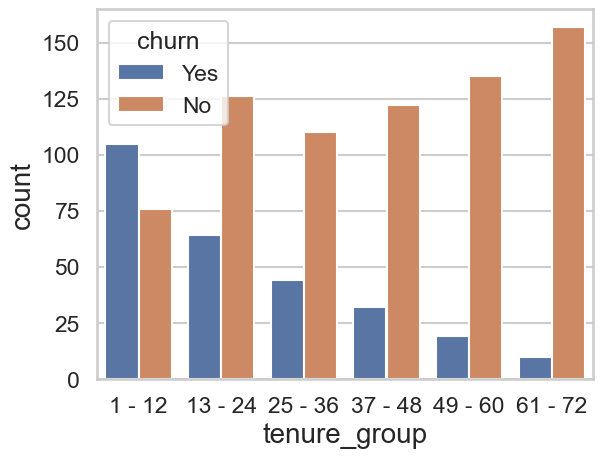

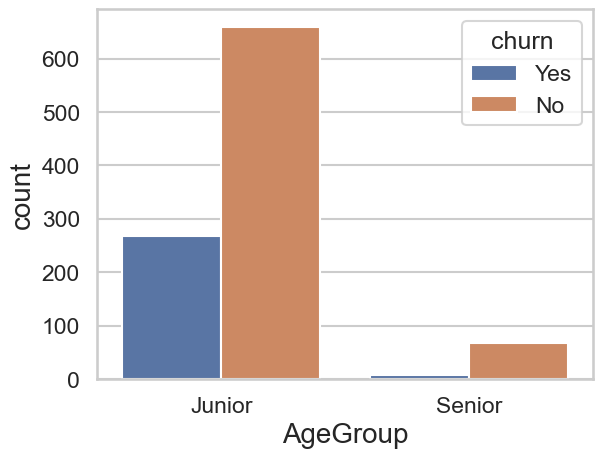

In [61]:
# subsetting numeric columns 
num_cols=data.select_dtypes([np.number]).columns

# Plot distribution of individual predictors by churn
for i, predictor in enumerate(data.drop(columns=num_cols)):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='churn')

<AxesSubplot:>

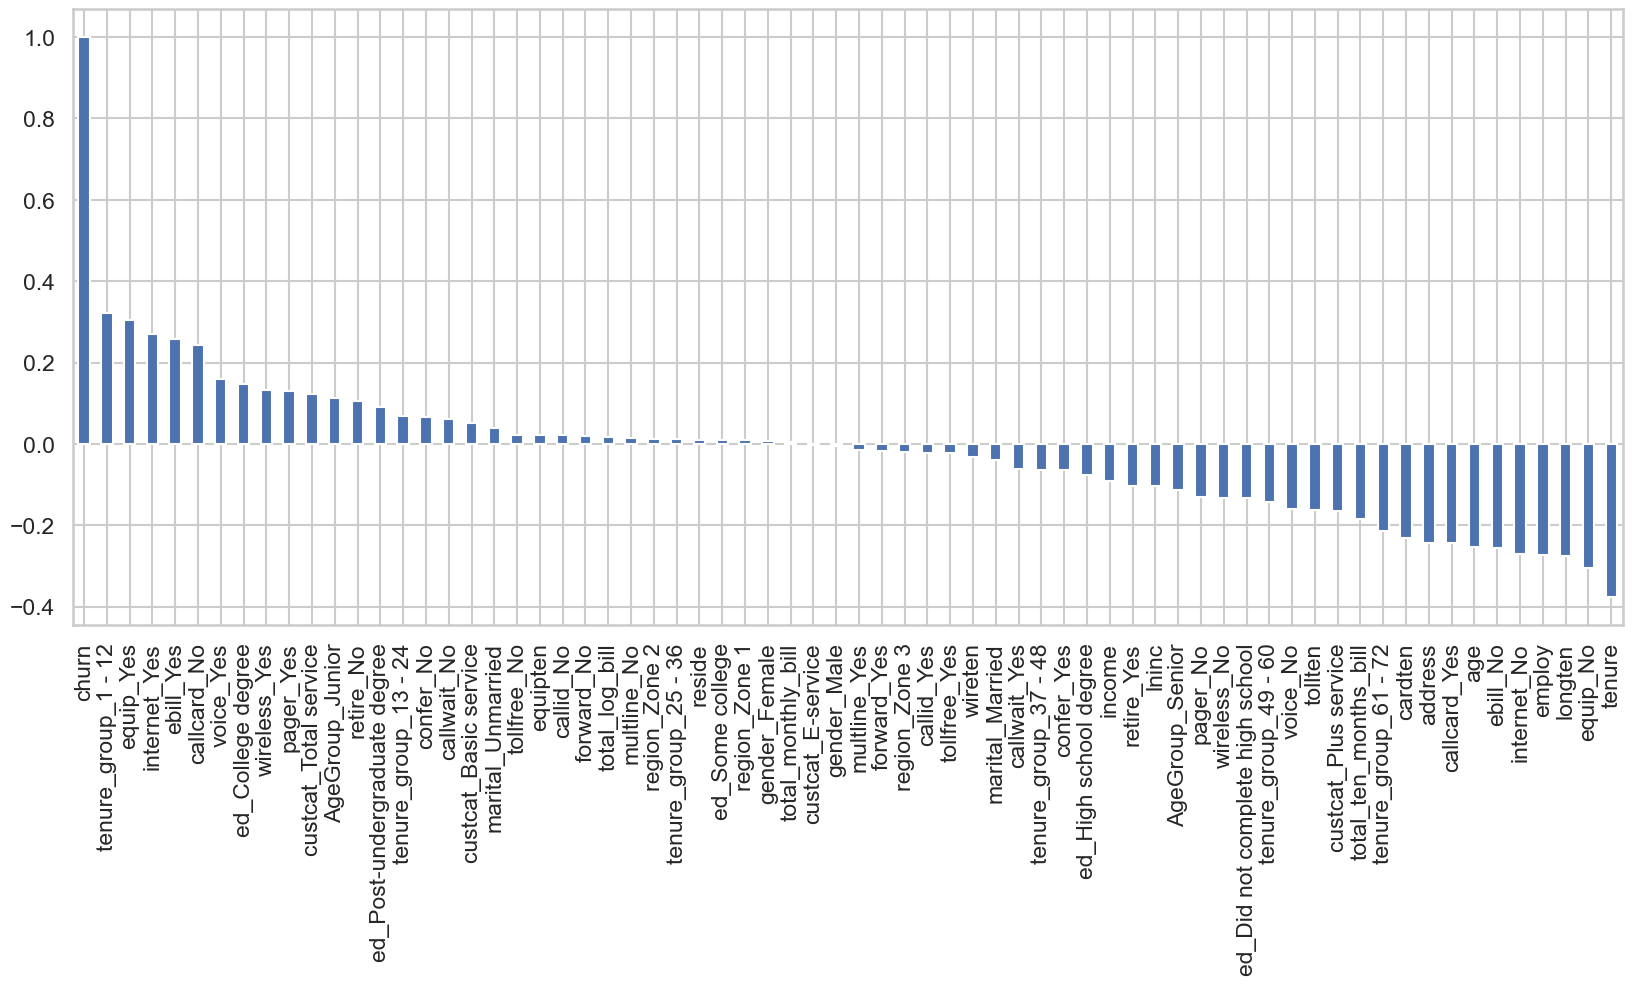

In [62]:


# converting target churn variables 
data['churn'] = np.where(data.churn == 'Yes',1,0)

data_dummies = pd.get_dummies(data)
data_dummies.head()

data_dummies.shape

data_dummies.to_csv("Dummy_Customer_Churn.csv")

plt.figure(figsize=(20,8))
data_dummies.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

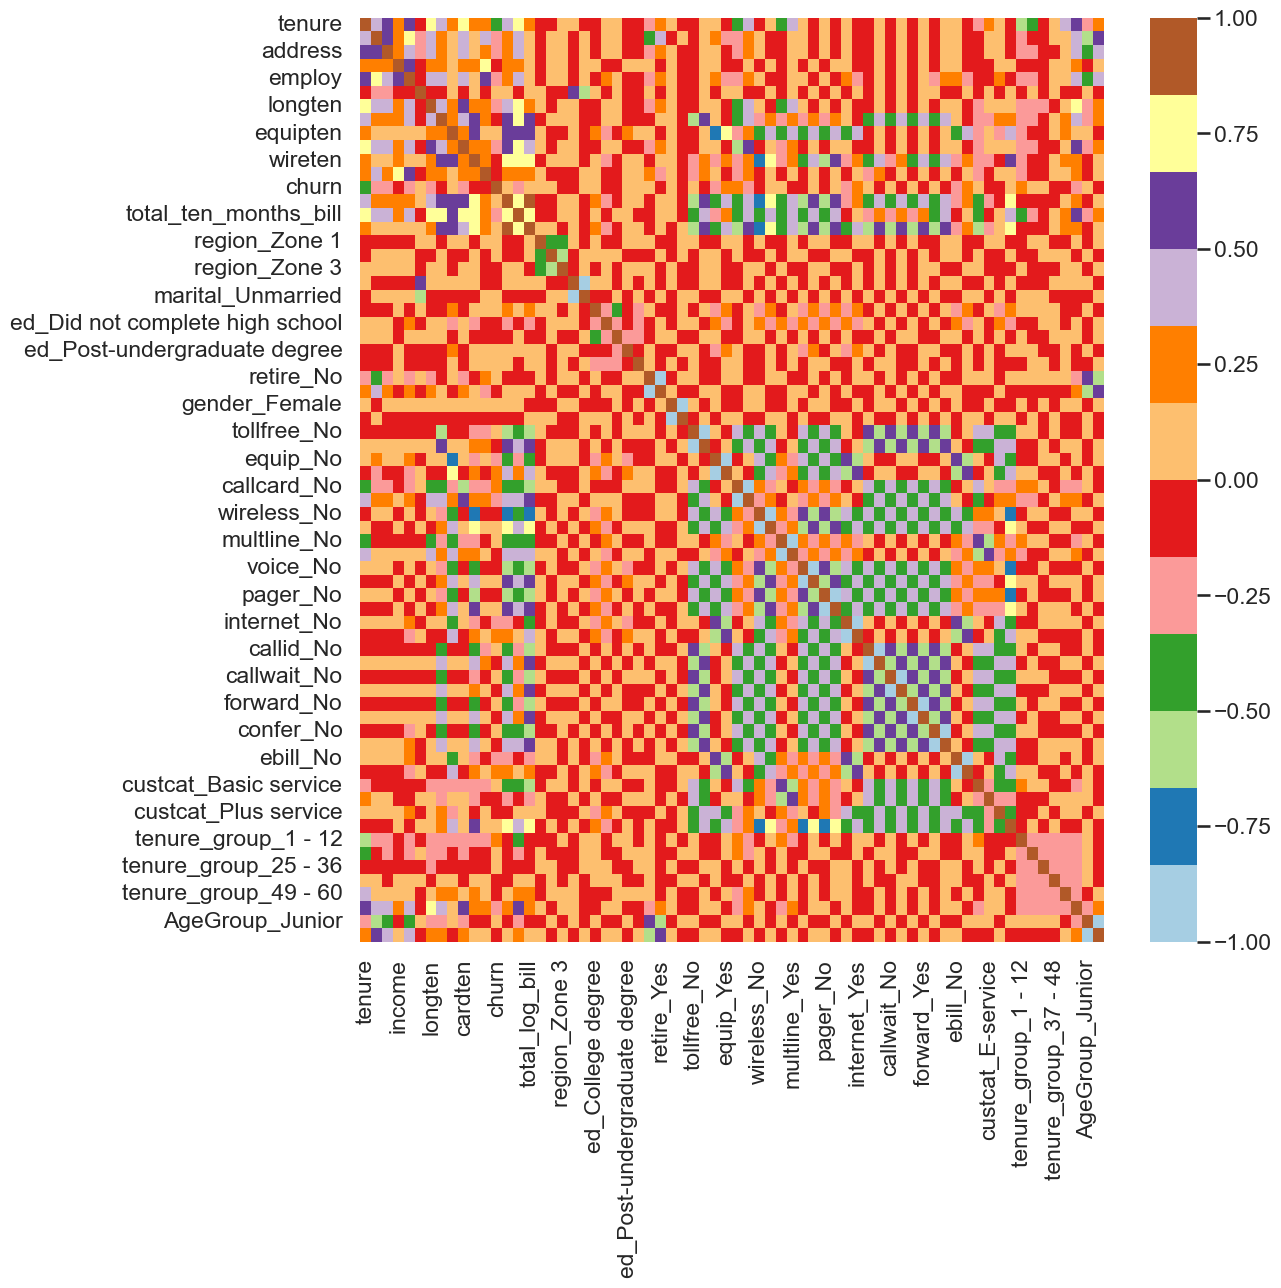

In [63]:

# Derived Insights:
# HIGH Churn seen in case of Month to month contracts, equip_yes, internet_yes, e_bill and equipmon
# LOW Churn is seen in case of Long term contracts, customer plus service and senior age group 
# Factors like customer E-service, gender and # of multiple lines have almost NO impact on Churn
# This is also evident from the Heatmap below
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired")

new_df1_target0=data.loc[data["churn"]==0]
new_df1_target1=data.loc[data["churn"]==1]



In [65]:
def uniplot(df,col,title,hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright') 
        
    plt.show()

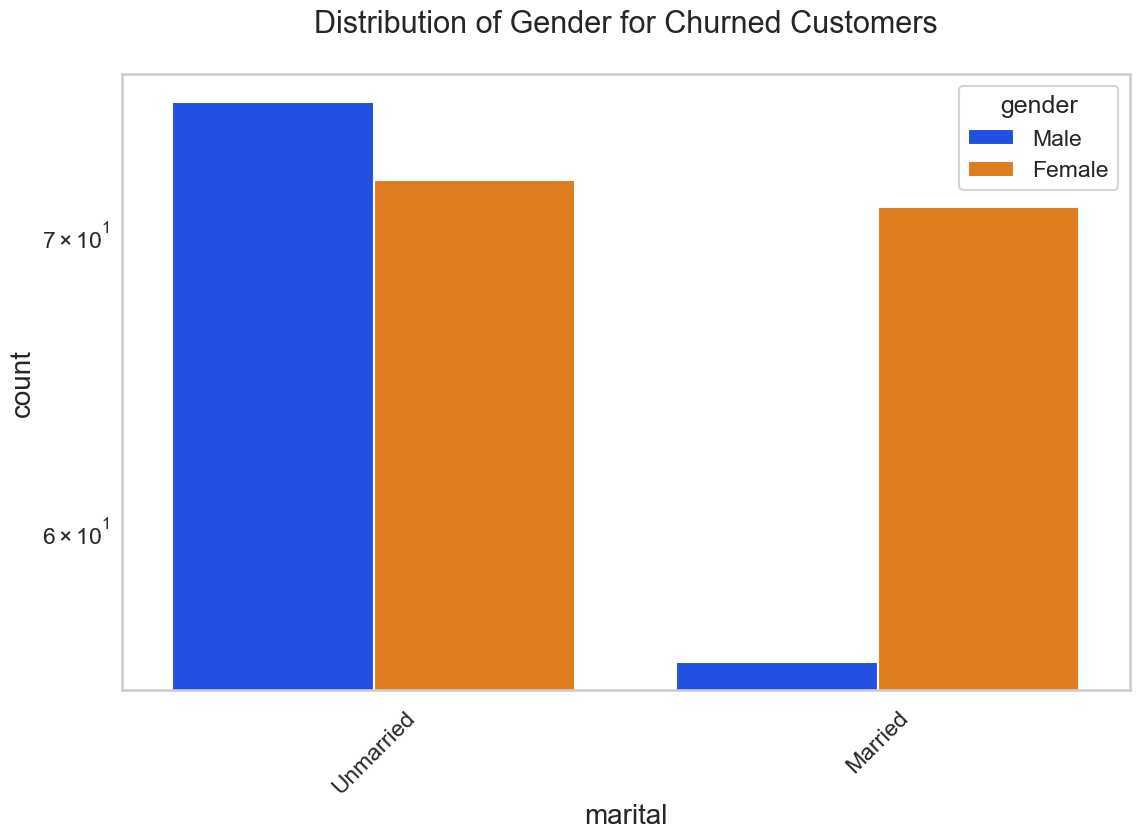

In [66]:
uniplot(new_df1_target1, col='marital', title='Distribution of Gender for Churned Customers', hue='gender')

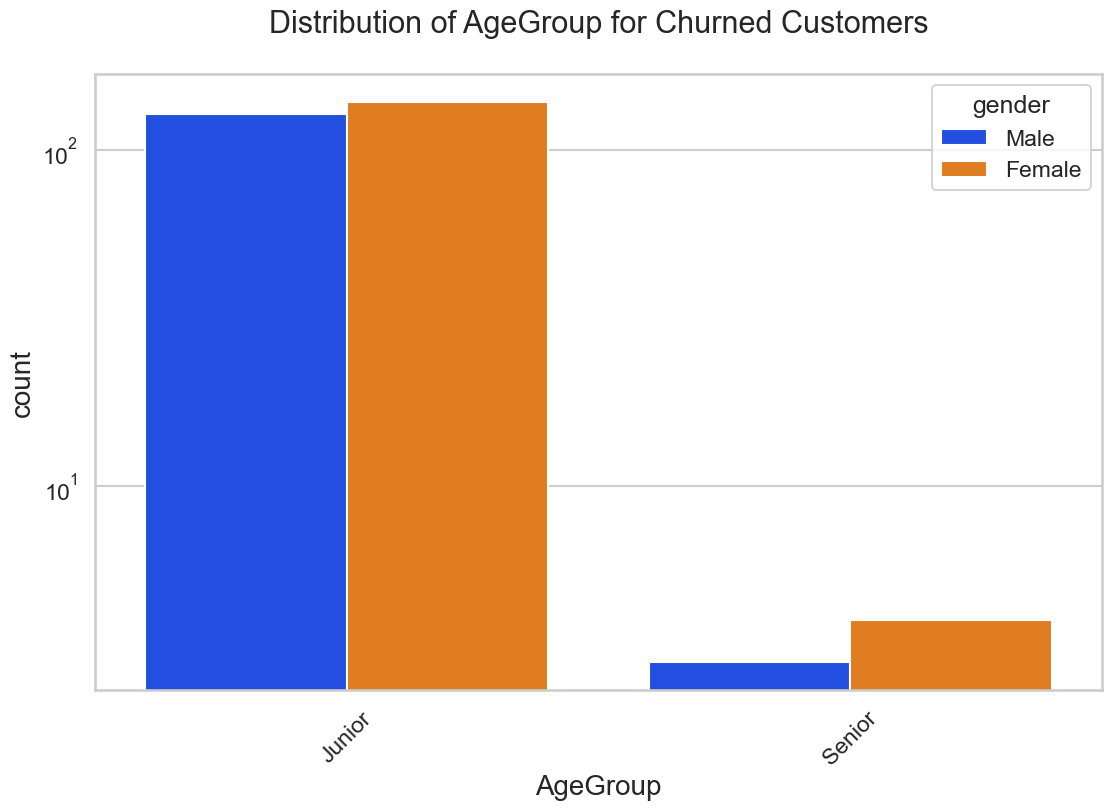

In [67]:
uniplot(new_df1_target1, col='AgeGroup', title='Distribution of AgeGroup for Churned Customers', hue='gender')

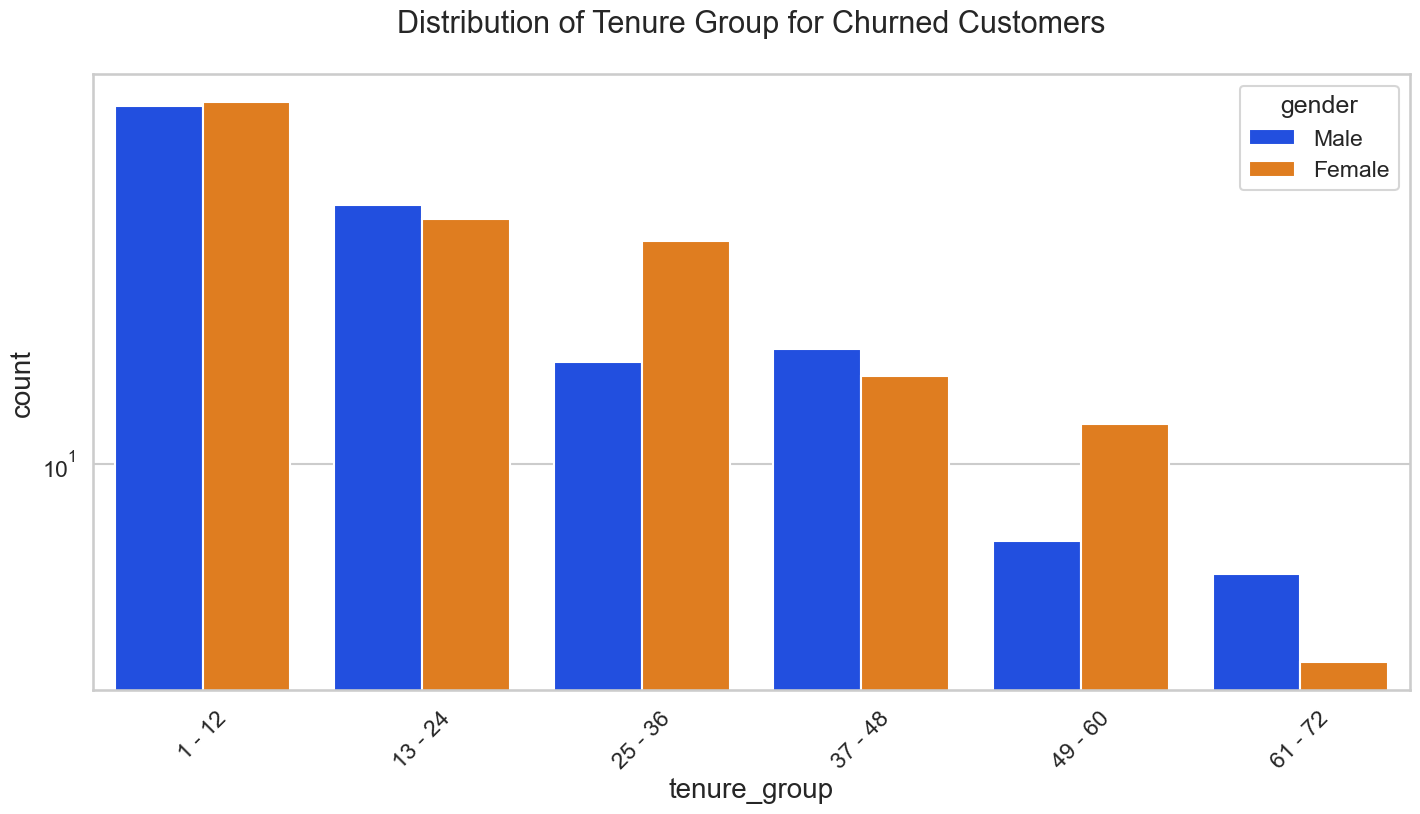

In [68]:
uniplot(new_df1_target1, col='tenure_group', title='Distribution of Tenure Group for Churned Customers', hue='gender')


In [69]:
customer_df['churn'] = np.where(customer_df.churn == 'Yes',1,0)
df_dummies = pd.get_dummies(customer_df)

df_dummies.to_csv('t_churns.csv')


In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from fastapi import FastAPI
from pydantic import BaseModel


In [71]:
# Load data
customer_df = pd.read_csv("t_churns.csv")

In [80]:
# Define dependent and independent variables
X = customer_df.drop('churn', axis=1)
y = customer_df['churn']


In [81]:
customer_df1=customer_df.drop('Unnamed: 0',axis=1)

In [82]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
# Build the model with tuning
def build_model(n_neurons=30, dropout_rate=0.5, optimizer='adam'):
    model = Sequential()
    model.add(Dense(n_neurons, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)
param_grid = {'n_neurons': [20, 30], 'dropout_rate': [0.3, 0.5], 'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if sys.path[0] == "":
2023-04-20 22:24:32.136109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


25/25 [==============================] - 1s 3ms/step - loss: 0.8050 - accuracy: 0.5225


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc4ac84d850>,
             param_grid={'dropout_rate': [0.3, 0.5], 'n_neurons': [20, 30],
                         'optimizer': ['adam', 'rmsprop']})

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
import os
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model  import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
## Logistic Regression 
Logist = LogisticRegression()

Logist.fit(X_train,Y_train)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [91]:
## Creating function that will evaluate model. 
## It will help us to reduced the code size and increase reusability of code

def evaluate_model(model,x_train,y_train,x_test,y_test,fit=False):
    '''
    Model Evaluation for Classifier
    :param  model : model object 
    :param x_train: Train features
    :param y_train: Train Target 
    :param x_test: Test features
    :param y_test: Test Target 
    :param fit bool : True if model is already fited else false

    :return: Train and Test Classification report and AUC- ROC Graph
    '''
    if fit == False:
        model.fit(x_train,y_train)
    train_pred=model.predict(x_train)
    print("Training report")
    print(classification_report(y_train, train_pred))    
    
    print("Testing report")
    test_pred=model.predict(x_test)    
    print(classification_report(y_test, test_pred))

# evaluating the model 
evaluate_model(Logist,X_train,Y_train,X_test,y_test,fit=True)

model_score_log_reg= Logist.score(X_test, y_test)
print('Test Score: ',model_score_log_reg)

Training report
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       581
           1       0.60      0.03      0.05       219

    accuracy                           0.73       800
   macro avg       0.67      0.51      0.45       800
weighted avg       0.69      0.73      0.63       800

Testing report
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       149
           1       0.00      0.00      0.00        51

    accuracy                           0.70       200
   macro avg       0.37      0.47      0.41       200
weighted avg       0.55      0.70      0.62       200

Test Score:  0.705


* It is important to evaluate the recall, precision, and f1 score for the minority class, which is the churned customers in this case. It is apparent that the precision, recall, and f1 score for Class 1 are quite low.

In [93]:
## Using SMOTE To balance Training dataset 

over_sam = SMOTE()
x_train, y_train = over_sam.fit_resample(X_train, Y_train)

log_reg_smote = LogisticRegression()

log_reg_smote.fit(x_train,y_train)

print("Training data size")
print(x_train.shape)
print(y_train.value_counts())
evaluate_model(log_reg_smote,x_train,y_train,X_test,y_test,fit=True)

model_score_log_reg_smote= log_reg_smote.score(X_test, y_test)
print('Test Score: ',model_score_log_reg_smote)

Training data size
(1162, 60)
0    581
1    581
Name: churn, dtype: int64
Training report
              precision    recall  f1-score   support

           0       0.54      0.62      0.58       581
           1       0.55      0.48      0.51       581

    accuracy                           0.55      1162
   macro avg       0.55      0.55      0.54      1162
weighted avg       0.55      0.55      0.54      1162

Testing report
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       149
           1       0.32      0.49      0.39        51

    accuracy                           0.60       200
   macro avg       0.55      0.57      0.55       200
weighted avg       0.67      0.60      0.63       200

Test Score:  0.605


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [95]:
# %
#applying smoteenn to balance our data set 
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [96]:
#logistic regression with smoteenn
smote_log=LogisticRegression()

smote_log.fit(xr_train,yr_train)
model1_score_r = smote_log.score(xr_test, yr_test)

evaluate_model(smote_log,xr_train,yr_train,xr_test,yr_test,fit=True)
print('Test Score :',model1_score_r)


Training report
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       286
           1       0.89      0.91      0.90       391

    accuracy                           0.88       677
   macro avg       0.88      0.88      0.88       677
weighted avg       0.88      0.88      0.88       677

Testing report
              precision    recall  f1-score   support

           0       0.92      0.78      0.85        74
           1       0.85      0.95      0.90        96

    accuracy                           0.88       170
   macro avg       0.89      0.87      0.87       170
weighted avg       0.88      0.88      0.87       170

Test Score : 0.8764705882352941


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [97]:
# %%
# Random Forest
rand = RandomForestClassifier(n_jobs=-1)
rand.fit(x_train,y_train)
evaluate_model(rand,x_train,y_train,X_test,y_test,fit=True)

model_score_rand_clf = rand.score(X_test, y_test)
print('Test Score: ',model_score_rand_clf)

Training report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       581
           1       1.00      1.00      1.00       581

    accuracy                           1.00      1162
   macro avg       1.00      1.00      1.00      1162
weighted avg       1.00      1.00      1.00      1162

Testing report
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       149
           1       0.21      0.06      0.09        51

    accuracy                           0.70       200
   macro avg       0.48      0.49      0.46       200
weighted avg       0.61      0.70      0.64       200

Test Score:  0.705


In [100]:
## Hyperparameter tunining 
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
random_search = RandomizedSearchCV(estimator=rand,param_distributions=grid_param,cv=5,n_jobs =-1,verbose = 3)
random_search.fit(x_train,y_train)

print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 115, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 11, 'criterion': 'gini'}


In [103]:
rand_tune = RandomForestClassifier(criterion= 'entropy',
 max_depth = 14,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 4,
 n_estimators = 115,random_state=6)

rand_tune.fit(x_train,y_train)
evaluate_model(rand_tune,x_train,y_train,X_test,y_test,fit=True)

model_score_rand_clf_tune = rand_tune.score(X_test, y_test)
print('Test Score: ',model_score_rand_clf_tune)

Training report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       581
           1       1.00      1.00      1.00       581

    accuracy                           1.00      1162
   macro avg       1.00      1.00      1.00      1162
weighted avg       1.00      1.00      1.00      1162

Testing report
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       149
           1       0.14      0.04      0.06        51

    accuracy                           0.69       200
   macro avg       0.44      0.48      0.44       200
weighted avg       0.59      0.69      0.63       200

Test Score:  0.695


In [104]:
# Random Forest with smoteenn

model_rf_smoteen=RandomForestClassifier(criterion= 'entropy',
 max_depth = 14,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 4,
 n_estimators = 115,random_state=6)

In [106]:
model_rf_smoteen.fit(xr_train,yr_train)
yr_predict4 = model_rf_smoteen.predict(xr_test)
model3_score_r = model_rf_smoteen.score(xr_test, yr_test)

evaluate_model(model_rf_smoteen,xr_train,yr_train,xr_test,yr_test,fit=True)
print('Test Score :',model3_score_r)


Training report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       286
           1       0.99      1.00      1.00       391

    accuracy                           1.00       677
   macro avg       1.00      0.99      1.00       677
weighted avg       1.00      1.00      1.00       677

Testing report
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        74
           1       0.93      0.96      0.94        96

    accuracy                           0.94       170
   macro avg       0.94      0.93      0.93       170
weighted avg       0.94      0.94      0.94       170

Test Score : 0.9352941176470588
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=115;, score=0.635 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=130;, score=0

[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=115;, score=0.884 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=130;, score=0.802 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.888 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130;, score=0.532 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=90;, score=0.918 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=90;, score=0.614 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_lea

In [108]:
import pickle
pickle_out=open("model_rf_smoteen.pkl","wb")
pickle.dump(model_rf_smoteen,pickle_out)
pickle_out.close()